# Classification

### Variable combinations, feature generation and interaction features

In [6]:
# imports
import pandas as pd

In [7]:
df = pd.read_csv('../Data/ad_click_dataset.csv')

df.drop(['full_name'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['device_type'] = label_encoder.fit_transform(df['device_type'])
df['ad_position'] = label_encoder.fit_transform(df['ad_position'])
df['browsing_history'] = label_encoder.fit_transform(df['browsing_history'])
df['time_of_day'] = label_encoder.fit_transform(df['time_of_day'])

df.dropna(inplace=True)

Cluster Profiling + PCA analysis

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocess the data (standardize for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Do K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['cluster'] = clusters

# Create cluster profiles by grouping data
cluster_profiles = df.groupby('cluster').mean()

# Show the results
print("Cluster Profiles:")
print(cluster_profiles)


Cluster Profiles:
               age    gender  device_type  ad_position  browsing_history  \
cluster                                                                    
0        40.071564  0.463585     1.309690     1.360988          4.020266   
1        40.903371  2.778427     1.382921     1.443596          4.581124   
2        39.237762  2.167133     1.420280     1.328671          0.892308   

         time_of_day     click  
cluster                         
0           1.920836  0.654845  
1           1.955506  0.639551  
2           2.224476  0.625175  


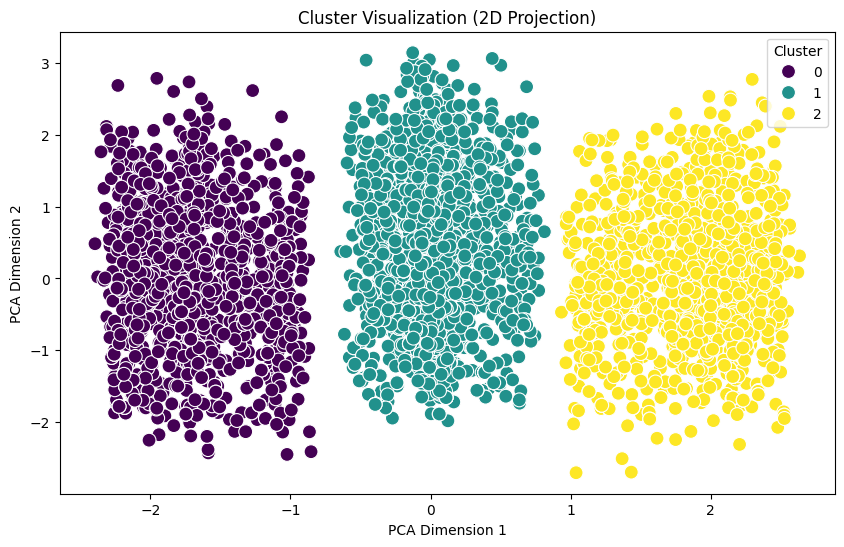

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

df['pca_x'] = reduced_data[:, 0]
df['pca_y'] = reduced_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=df, palette='viridis', s=100)
plt.title("Visualization of th clusters")
plt.xlabel("dimension 1")
plt.ylabel("dimension 2")
plt.legend(title="cluster", loc='best')
plt.show()
